# 数据预处理

In [ ]:
# import from csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns

random.seed(50)

# Importing the dataset
dataset = pd.read_csv('./datasets/SyntheticFinancialDatasets/syn_data.csv')
dataset.drop('nameOrig', axis=1, inplace=True)
dataset.drop('nameDest', axis=1, inplace=True)
dataset.drop('isFlaggedFraud', axis=1, inplace=True)

In [ ]:
# sample the data
# sample_dataframe = dataset.sample(n=300000)
sample_dataframe = dataset

In [ ]:
sample_dataframe.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [51]:
sample_dataframe['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

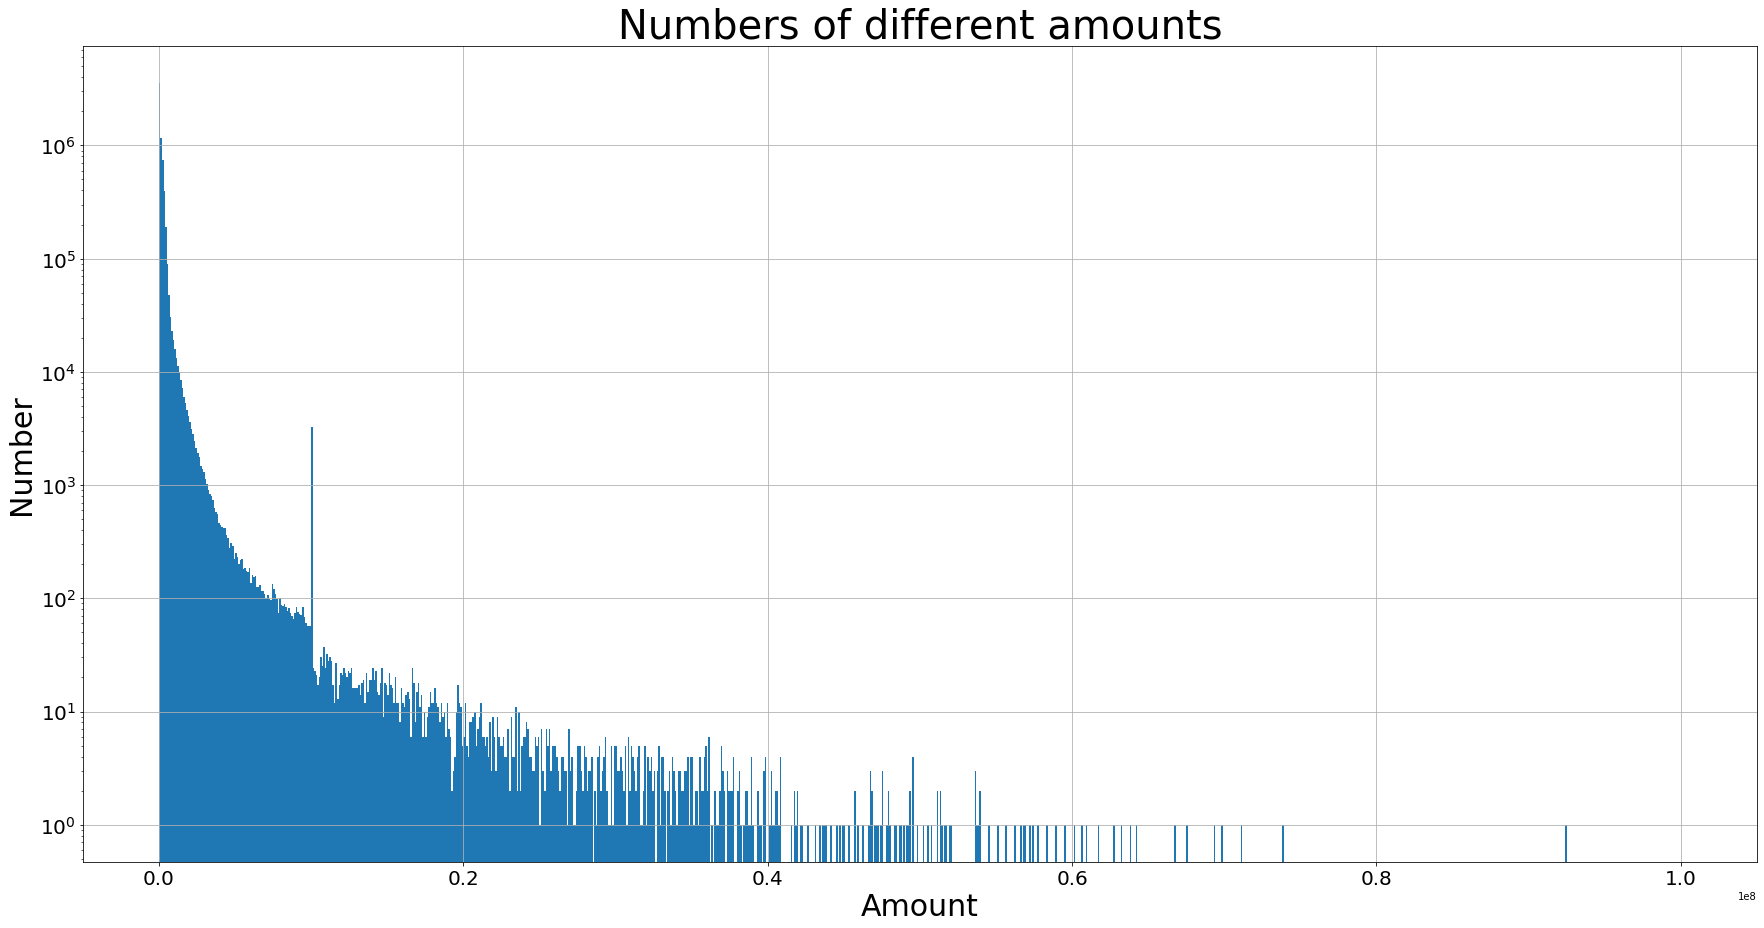

In [14]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(30, 15)

plt.title("Numbers of different amounts", fontsize=40)
sample_dataframe['amount'].hist(bins=1000, range=(0, 1e8), log=True)
# sample_dataframe['amount'].hist(bins=100000, log=True)
# ax1.set_yscale('log')
plt.xlabel('Amount', fontsize=30)
plt.ylabel('Number', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("./pics/original/Numbers of different amounts.png")
plt.show()

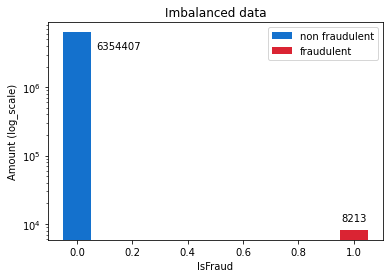

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# data = np.random.rand(1000)

plt.title("Imbalanced data")
# N, bins, patches = ax.hist(sample_dataframe['isFraud'], bins=10, range=(0, 1), log=True)
# for i in range(0, 1):
#     patches[i].set_facecolor('r')
# for i in range(1, 2):    
#     patches[i].set_facecolor('r')
# plt.show()

a = sample_dataframe['isFraud'].value_counts()

x = a.index
# print(x)
y = a.values
# print(y)

x_0 = x[0]
y_0 = y[0]
x_1 = x[1]
y_1 = y[1]

plt.bar(x_0, y_0, width=0.1, log=True, facecolor='#1471CD', label='non fraudulent')
plt.bar(x_1, y_1, width=0.1, log=True, facecolor='#DA2433', label='fraudulent')
# barlist[0].set_color('#1471CD')
# barlist[1].set_color('#DA2433')

plt.legend(loc="upper right")

plt.xlabel('IsFraud')
plt.ylabel('Amount (log_scale)')

# for a,b in zip(x_0, y_0):
#     plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom', fontsize=10, bbox=dict(boxstyle='square, pad=0.5', fc='w', ec='none'))
for a,b in zip(x,y):
    if a==0:
        plt.text(a+0.15, b-3000000, '%.0f' % b, ha='center', va= 'bottom', fontsize=10, bbox=dict(boxstyle='square, pad=0.0', fc='w', ec='none'))
    else:
        plt.text(a, b+2000, '%.0f' % b, ha='center', va= 'bottom', fontsize=10, bbox=dict(boxstyle='square, pad=0.0', fc='w', ec='none'))

plt.savefig("./pics/original/Imbalanced data.png")
plt.show()

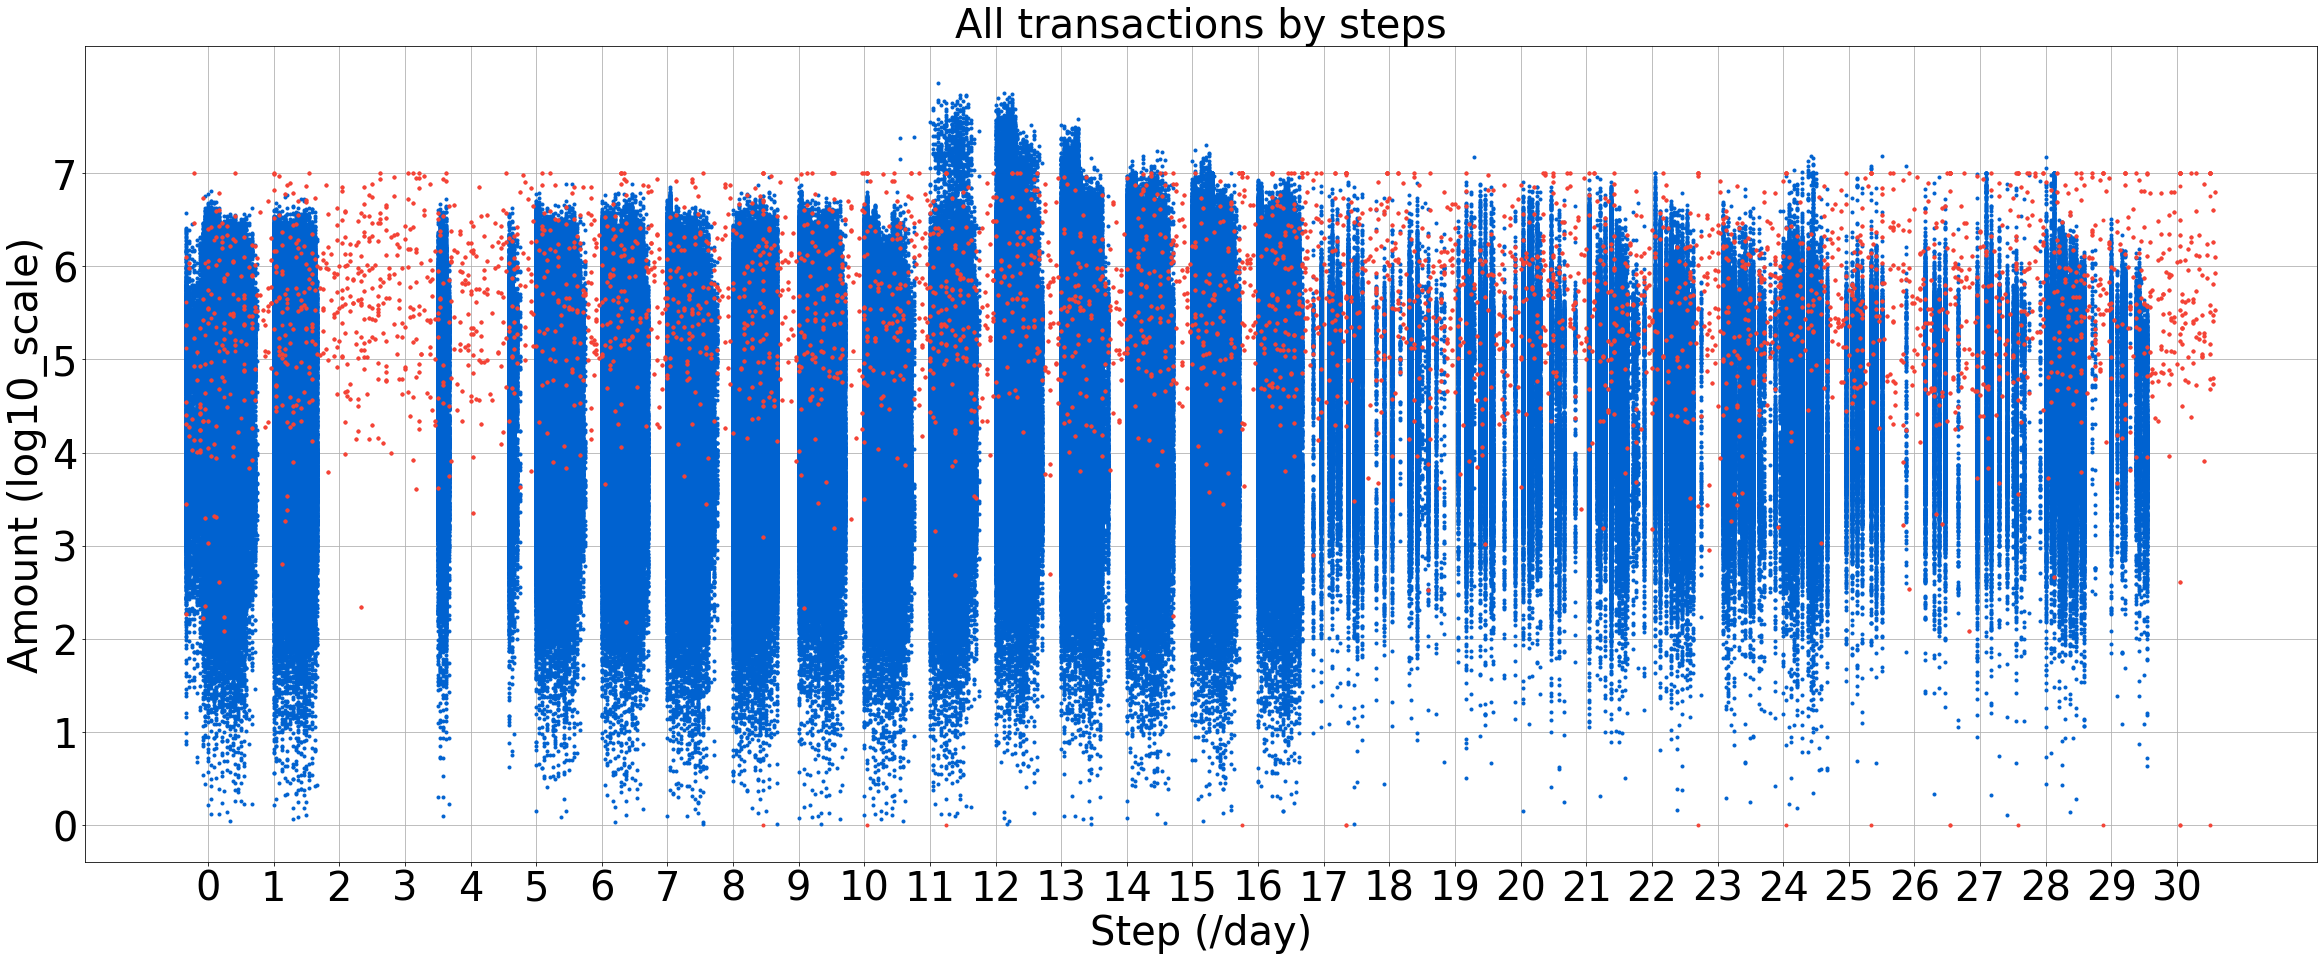

In [6]:
plt.figure(figsize=(40,15))
plt.title("All transactions by steps", fontsize=40)
plt.plot(sample_dataframe[sample_dataframe['isFraud']==0]['step']/24-9/24, np.log10(sample_dataframe[sample_dataframe['isFraud']==0]['amount']+1), color="#0062D0", marker='.', linestyle='', markersize=6)
plt.plot(sample_dataframe[sample_dataframe['isFraud']==1]['step']/24-9/24, np.log10(sample_dataframe[sample_dataframe['isFraud']==1]['amount']+1), color="#F44336", marker='.', linestyle='', markersize=6)
# plt.plot(sample_dataframe['step']/24-1/3, np.log10(sample_dataframe['amount']+1), 'b.', markersize=1)
plt.xlabel('Step (/day)', fontsize=40)
plt.ylabel('Amount (log10_scale)', fontsize=40)
plt.xticks(np.arange(0, 743/24, 1), fontsize=40)
plt.yticks(np.arange(0, 8, 1), fontsize=40)
plt.grid()
plt.savefig("./pics/original/All transactions by steps.png")
plt.show()

In [21]:
sample_dataframe.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1


In [22]:
X = sample_dataframe.iloc[:, :-1].values
y = sample_dataframe.iloc[:, 7].values

print(sample_dataframe.isFraud.value_counts())

0    6354407
1       8213
Name: isFraud, dtype: int64


In [23]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# LabelEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])

# # OneHotEncoder
# onehotencoder = ColumnTransformer([("type", OneHotEncoder(), [1])], remainder = 'passthrough')
# X = onehotencoder.fit_transform(X)

# # Avoiding the Dummy Variable Trap
# X = X[:, 1:]

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

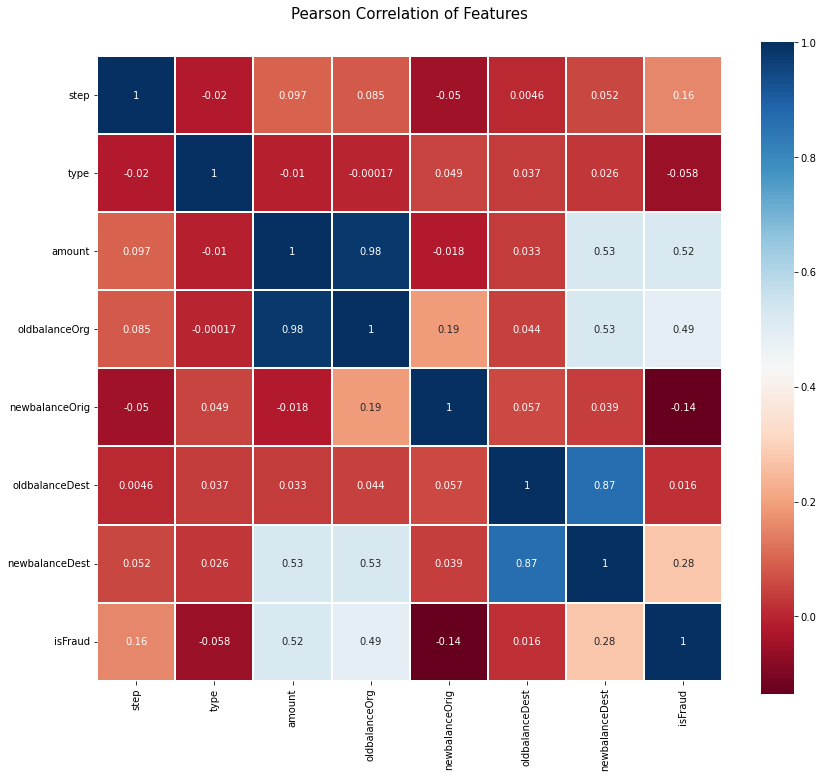

In [17]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# sample_dataframe = sample_dataframe.to_numpy()

# LabelEncoder
labelencoder = LabelEncoder()
sample_dataframe['type'] = labelencoder.fit_transform(sample_dataframe['type'])

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(sample_dataframe.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [10]:
sample_dataframe[sample_dataframe['type']=='PAYMENT'].describe()['amount']['mean']

13057.604660187359

In [11]:
sample_dataframe[sample_dataframe['type']=='TRANSFER'].describe()['amount']['mean']

910647.0096454779

In [12]:
sample_dataframe[sample_dataframe['type']=='CASH_OUT'].describe()['amount']['mean']

176273.96434613984

In [13]:
sample_dataframe[sample_dataframe['type']=='DEBIT'].describe()['amount']['mean']

5483.6653137671165

In [14]:
sample_dataframe[sample_dataframe['type']=='CASH_IN'].describe()['amount']['mean']

168920.2420040955

In [7]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

# positive and negative sets counts
counts = np.unique(y_train, return_counts=True)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
print(counts)

(array([0, 1], dtype=int64), array([209718,    282], dtype=int64))


## Visualisations 

In [131]:
from pandas import DataFrame
x_train_DataFrame = DataFrame(X_train, index=None,columns = ['type1', 'type2', 'type3', 'type4', 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])
# x_train_DataFrame = DataFrame(X_train, index=None,columns = ['type1', 'type2', 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])
x_train_DataFrame.head(3)

,type1,type2,type3,type4,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1.356206,-0.080077,-0.715229,-0.301615,0.890569,-0.180586,-0.288500,-0.292092,-0.290832,-0.286192
1,-0.737351,-0.080077,1.398154,-0.301615,-0.404884,-0.291432,0.040997,0.029228,-0.313170,-0.327416
2,1.356206,-0.080077,-0.715229,-0.301615,1.904402,-0.163730,-0.288500,-0.292092,-0.095967,-0.100913


**Pearson Correlation Heatmap**

let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

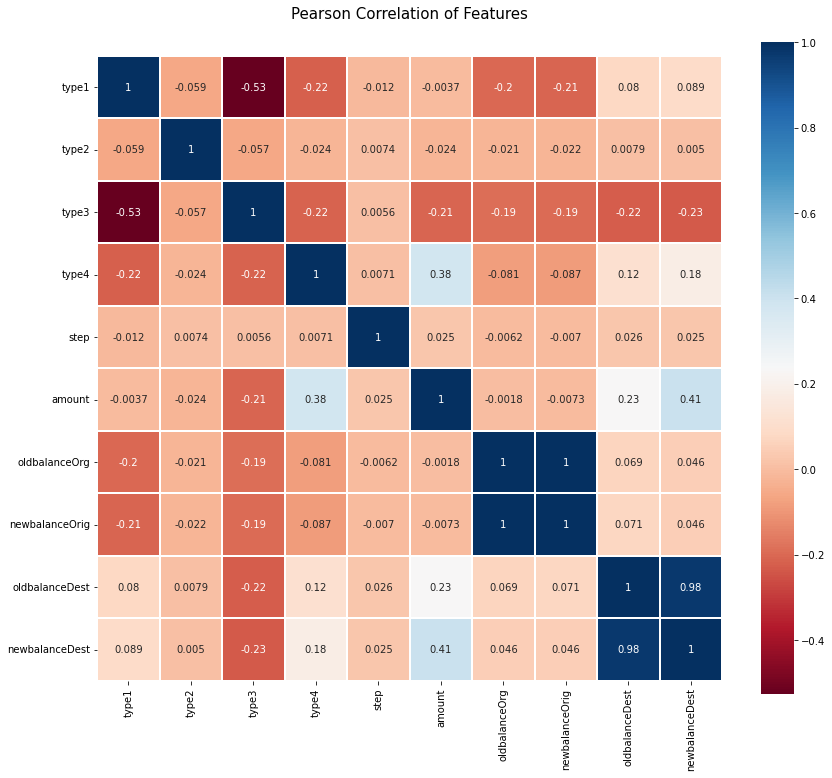

In [132]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train_DataFrame.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**Pairplots**

Finally let us generate some pairplots to observe the distribution of data from one feature to the other. Once again we use Seaborn to help us.

C:\Users\fzkuji\.conda\envs\Finance\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


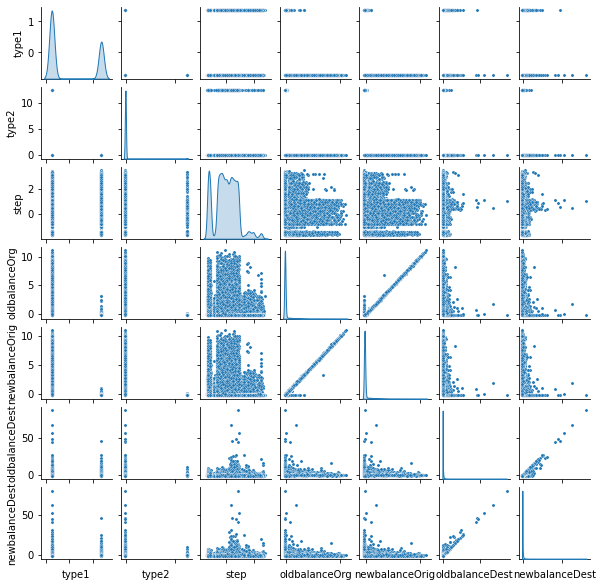

In [133]:
g = sns.pairplot(x_train_DataFrame[['type1', 'type2', 'step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']], palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])